# Data Description

# Dataset abbrevations:¶

## Import Basic Libaries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

## Import oder Libaries

In [2]:
import matplotlib.patches as mpatches
import matplotlib
import calendar
import gc

In [3]:
df_raw = pd.read_csv('US_Accidents_Dec20_Updated.csv')

In [4]:
df = df_raw.copy()

In [5]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.tail(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,...,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2906609,A-2906610,2,2018-03-26 13:35:03,2018-03-26 14:39:00,38.831749,-104.748161,38.831749,-104.748161,0.000,Accident on Murray Blvd at Byron Dr.,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [9]:
print(f"Number of Row : {df.shape[0]} and Numer of Columns: {df.shape[1]}")

Number of Row : 2906610 and Numer of Columns: 47


In [10]:
df = df.drop_duplicates()

In [11]:
print(f"Number of Row : {df.shape[0]} and Numer of Columns: {df.shape[1]}")

Number of Row : 2906610 and Numer of Columns: 47


## Missing Values

In [12]:
def find_missing_values(df):
    df_nan = ((df.isnull().sum()/len(df))*100).sort_values()
    df_miss = df_nan[df_nan >0]
    return df_miss

In [13]:
df_miss = find_missing_values(df)
print(df_miss)

City                      0.003716
Sunrise_Sunset            0.003784
Civil_Twilight            0.003784
Astronomical_Twilight     0.003784
Nautical_Twilight         0.003784
Zipcode                   0.038326
Timezone                  0.118007
Airport_Code              0.227344
Weather_Timestamp         1.614148
Pressure(in)              1.957882
Wind_Direction            2.183781
Temperature(F)            2.312797
Humidity(%)               2.451997
Weather_Condition         2.471986
Visibility(mi)            2.479796
End_Lng                   9.730270
End_Lat                   9.730270
Wind_Speed(mph)          10.567740
Wind_Chill(F)            40.729888
Precipitation(in)        44.771263
Number                   65.081728
dtype: float64


In [14]:
def plot_missing_values(df):
# Function to count the missing values in df
    plt.figure(figsize=(10,5), dpi=100)
    df_miss.plot(kind='bar')
    plt.title('Percentage Missing Values', fontsize=20)
    plt.xlabel('Columns Name' ,fontsize=14)
    plt.ylabel('Percentage of Missing Values',fontsize=14)

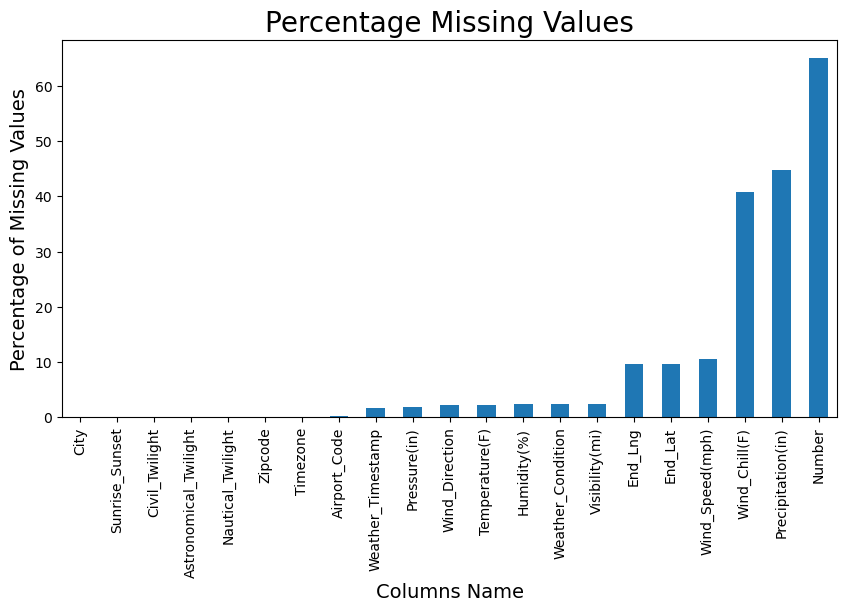

In [15]:
plot_missing_values(df_miss)

<AxesSubplot:>

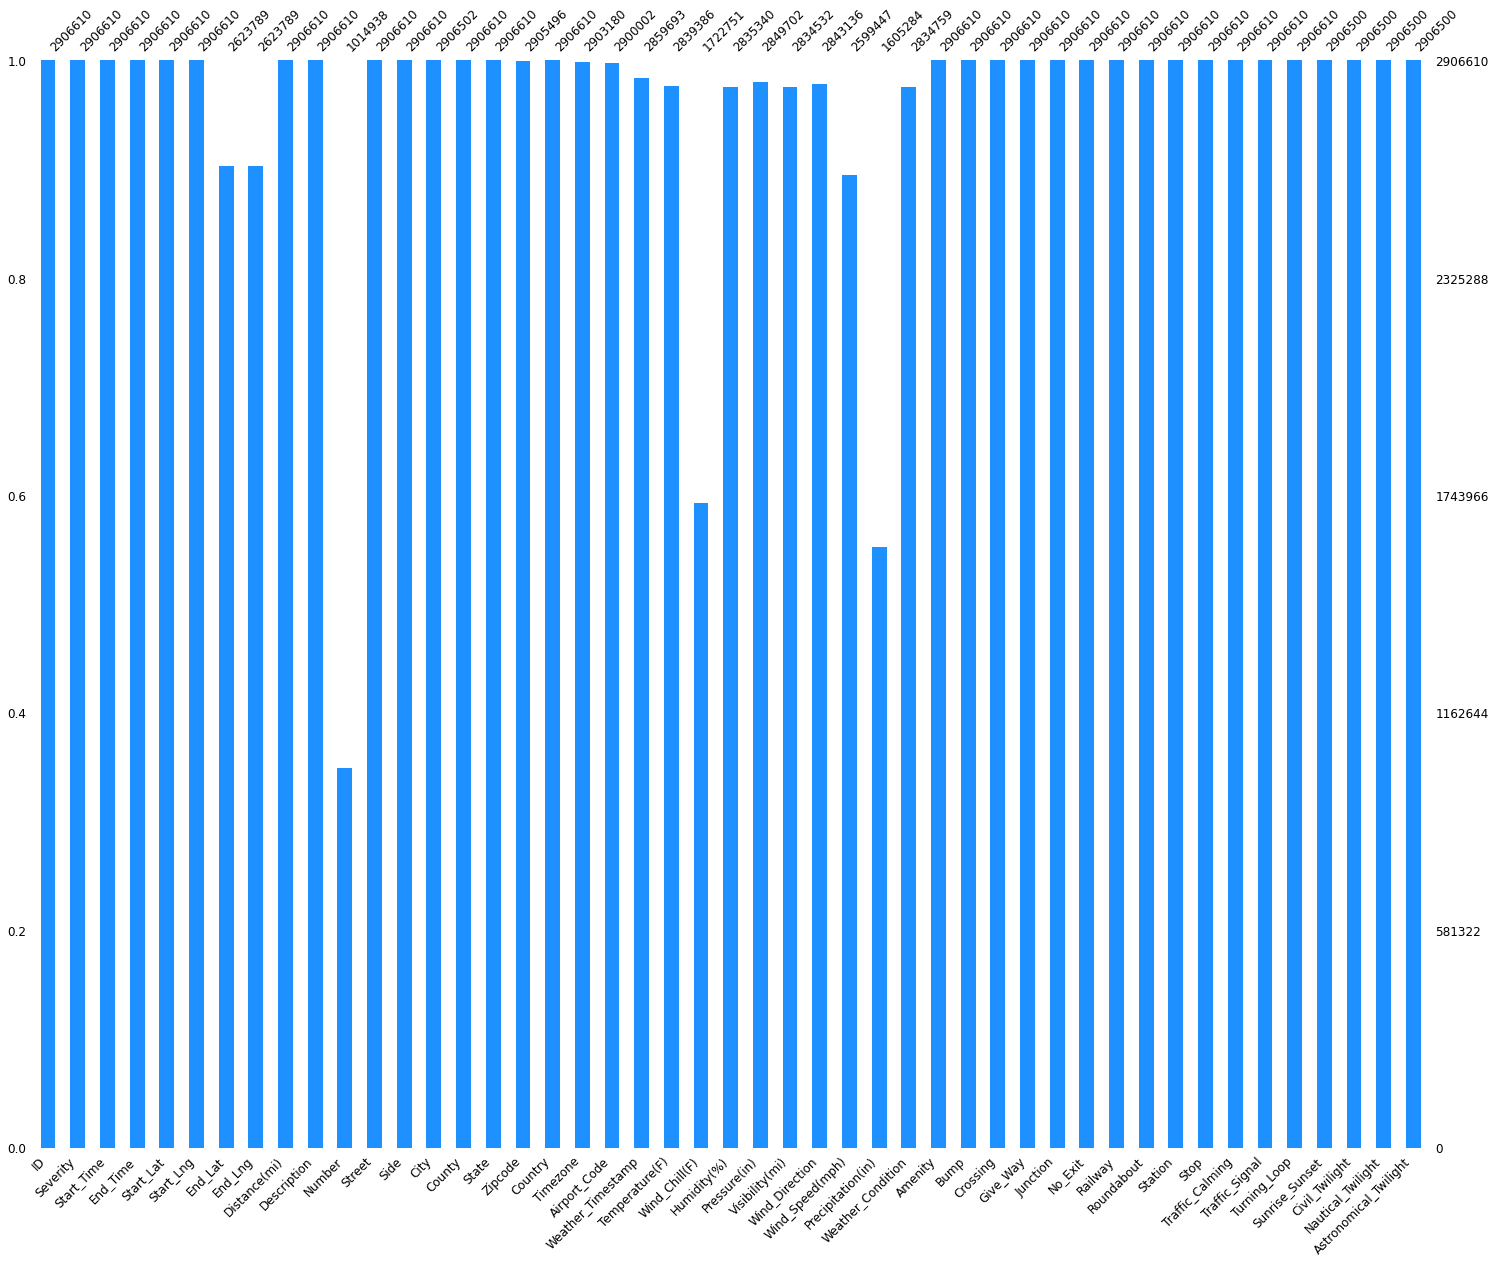

In [16]:
msno.bar(df, color="dodgerblue", fontsize=12, figsize=(25,20))

In [17]:
# Columns Name
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

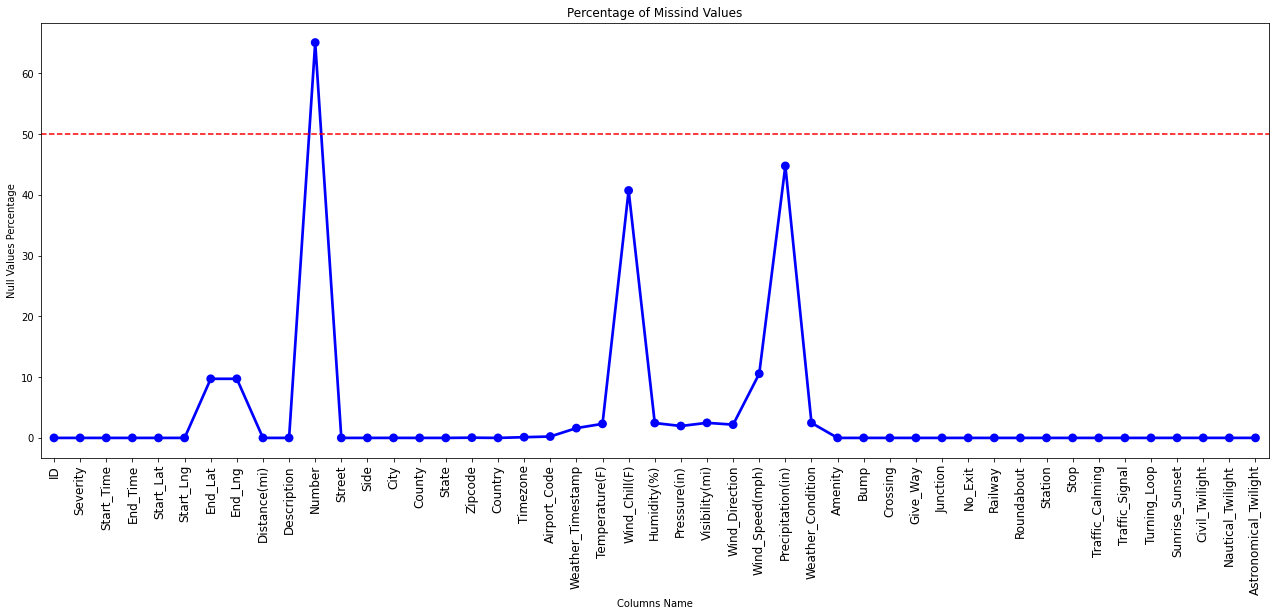

In [18]:
# Plot the Missing values 
null_df = pd.DataFrame((df.isnull().sum()/len(df)*100)).reset_index()
null_df.columns = ['Columns Name', 'Null Values Percentage']
fig = plt.figure(figsize=(22,8))
ax = sns.pointplot(x='Columns Name', y = 'Null Values Percentage', data=null_df, color='blue')
plt.xticks(rotation=90, fontsize=12)
ax.axhline(50, ls='--', color='red')
plt.title("Percentage of Missind Values")
plt.ylabel("Null Values Percentage")
plt.xlabel("Columns Name")
plt.show()

## EDA 

### 1. City in US with the most number of accident cases 

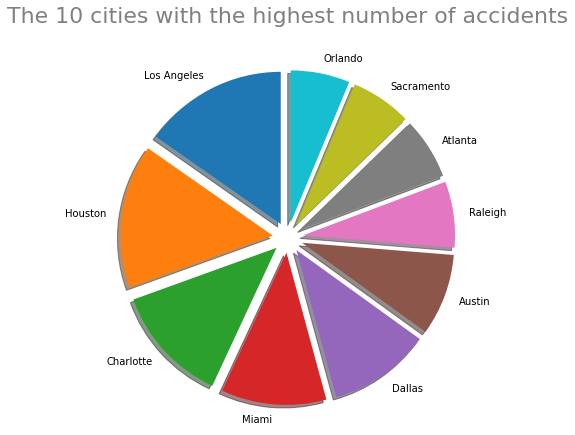

In [19]:
# The 10 cities with the highest number of accidents
cities = df['City'].value_counts()
plt.figure(figsize=(12,7))
plt.title("The 10 cities with the highest number of accidents",size=22,color="grey",y=1.05)
lab = cities[:10].index
plt.pie(cities[:10] ,shadow=True ,explode=(0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1,0.1) ,startangle=90 ,labels=lab)
plt.show()

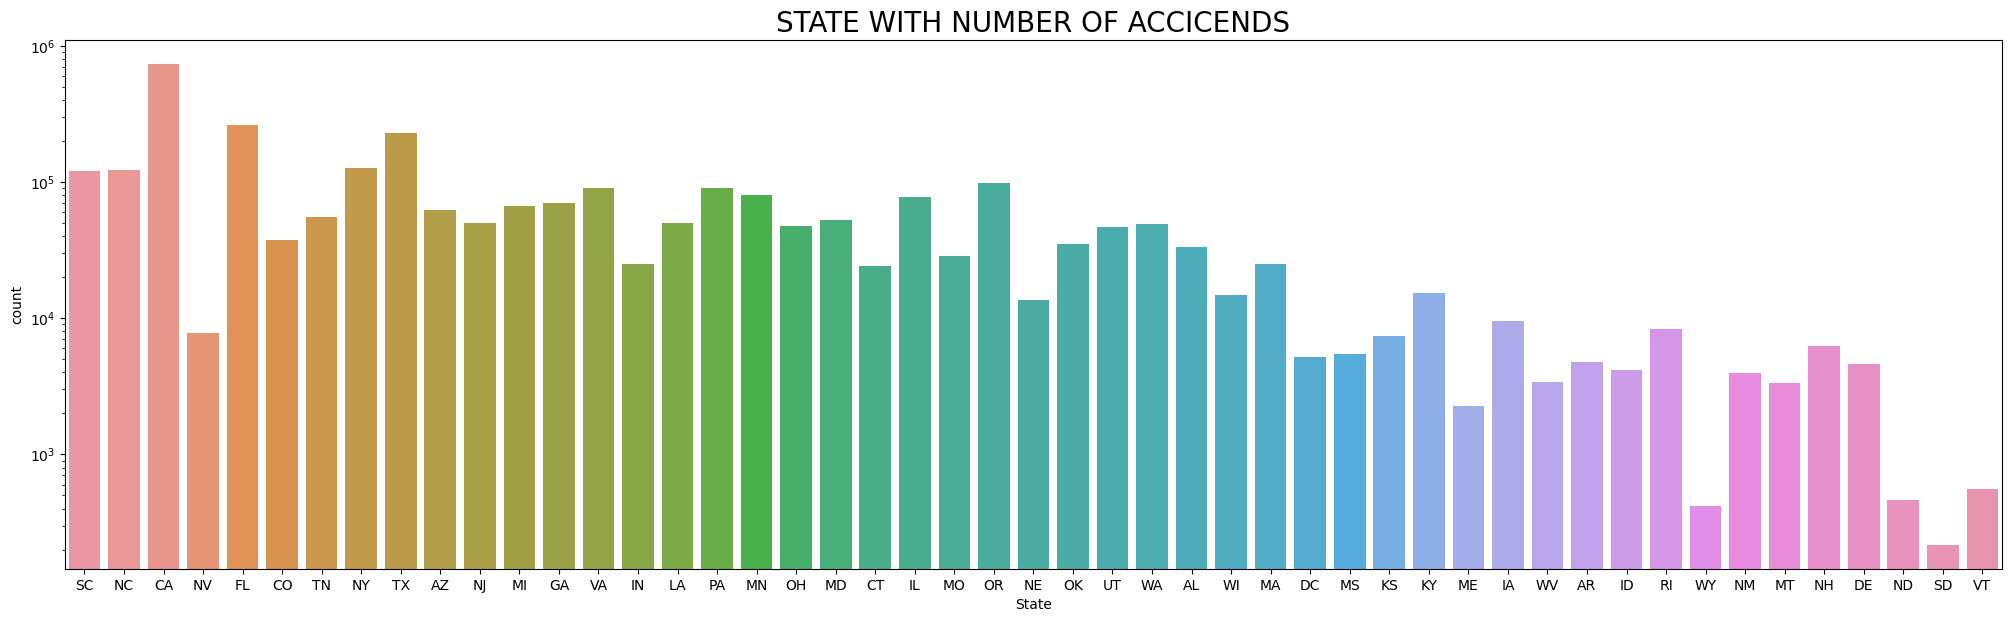

In [20]:
plt.figure(figsize=(25,7), dpi=100)
sns.countplot(x='State', data=df)
plt.yscale("log")
plt.title("STATE WITH NUMBER OF ACCICENDS", fontsize=20)
plt.show()

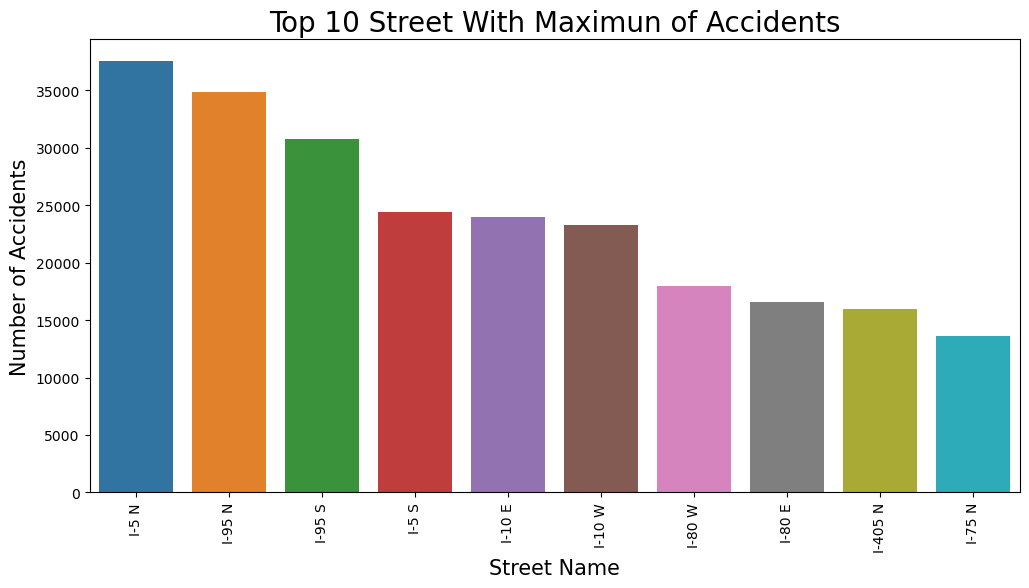

In [21]:
### Top 10 Street with maximun numer of accidents

streets_top_10  = df['Street'].value_counts().sort_values(ascending=False)[:10].reset_index()
streets_top_10.columns = ["Street Name", "Number of Accidents"]

fig = plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x=streets_top_10['Street Name'], y=streets_top_10['Number of Accidents'])
plt.xticks(rotation=90)
plt.xlabel('Street Name', fontsize=15)
plt.ylabel('Number of Accidents', fontsize=15)
plt.title("Top 10 Street With Maximun of Accidents", fontsize=20)
plt.show()

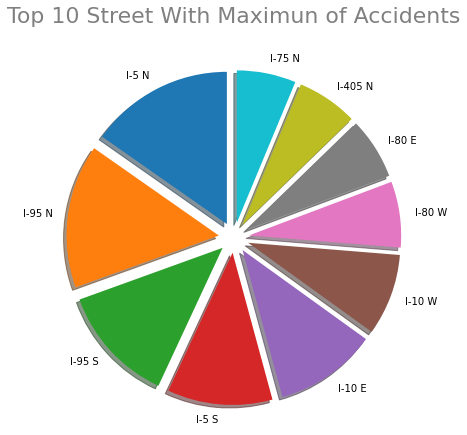

In [22]:
street = df['Street'].value_counts()
plt.figure(figsize=(12,7))
plt.title("Top 10 Street With Maximun of Accidents" ,size = 22 ,color="grey" ,y=1.05)
lab = street[:10].index
plt.pie(cities[:10] ,shadow=True ,explode=(0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1,0.1) ,startangle=90 ,labels=lab)
plt.show()

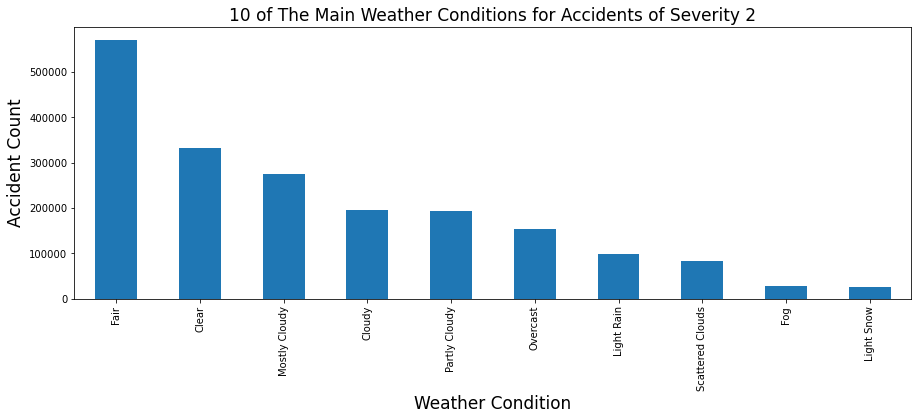

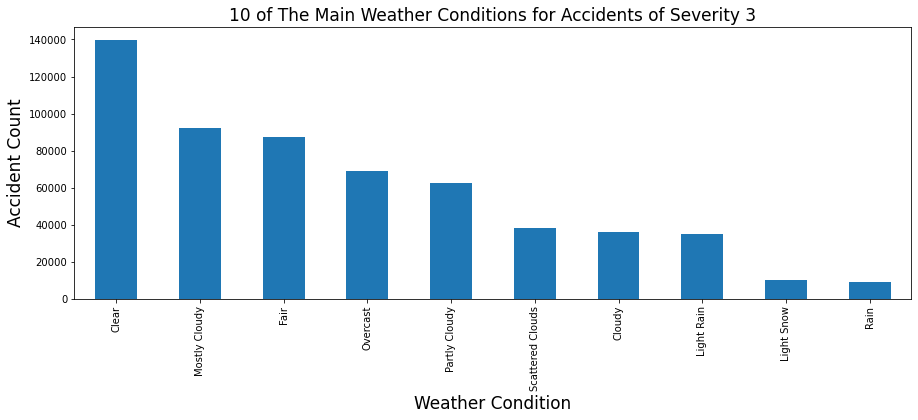

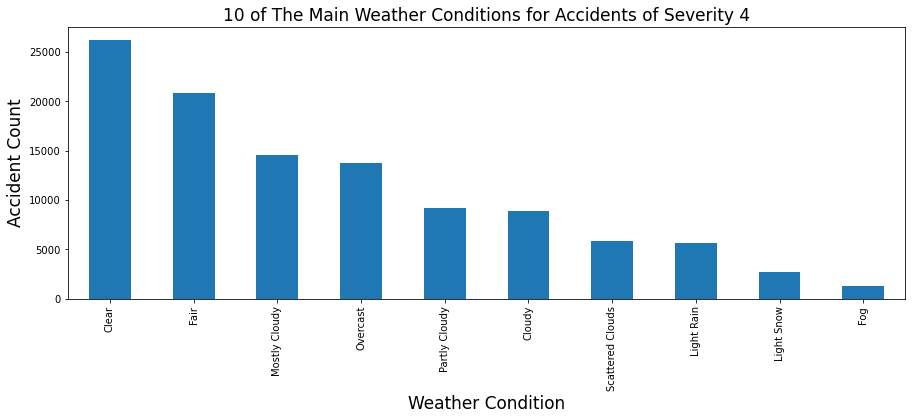

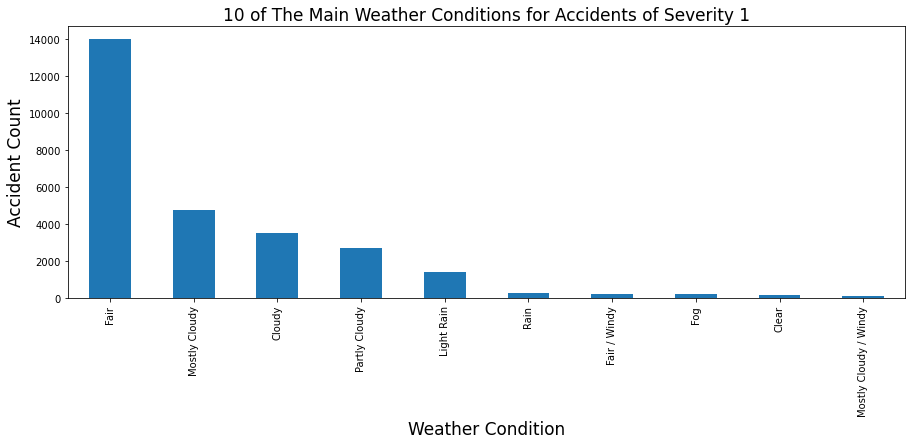

In [23]:
for x in df['Severity'].unique():
    plt.subplots(figsize=(15,5))
    severity = df[df['Severity']==x]['Weather_Condition'].value_counts().sort_values(ascending=False)[:10]
    severity.plot(kind='bar', align='center')
    plt.xlabel("Weather Condition", fontsize=17)
    plt.ylabel("Accident Count",fontsize=17)
    plt.title('10 of The Main Weather Conditions for Accidents of Severity ' + str(x),fontsize=17)

In [24]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [25]:
'''
geometry = [Point(x) for x in zip(df['Start_Lng'], df['Start_Lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(13,7)), marker='o', color='red', markersize=15)
plt.show()
'''

"\ngeometry = [Point(x) for x in zip(df['Start_Lng'], df['Start_Lat'])]\ngdf = GeoDataFrame(df, geometry=geometry)\n\nworld = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))\ngdf.plot(ax=world.plot(figsize=(13,7)), marker='o', color='red', markersize=15)\nplt.show()\n"

In [26]:
'''
plt.figure(figsize=(20,10), dpi=200)
sns.scatterplot(x=df['Start_Lng'], y=df['Start_Lat'], size=0.001, hue='Severity', data=df, alpha=0.5)
plt.xlabel("Start Longitude", fontsize=17)
plt.ylabel("Start Latitude", fontsize=17)
plt.title("US Accidents Start Latitude and Longitude", fontsize=22)
plt.show()
'''

'\nplt.figure(figsize=(20,10), dpi=200)\nsns.scatterplot(x=df[\'Start_Lng\'], y=df[\'Start_Lat\'], size=0.001, hue=\'Severity\', data=df, alpha=0.5)\nplt.xlabel("Start Longitude", fontsize=17)\nplt.ylabel("Start Latitude", fontsize=17)\nplt.title("US Accidents Start Latitude and Longitude", fontsize=22)\nplt.show()\n'

In [27]:
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

### What are the months, weeks, days and hours when accidents are most frequent

In [28]:
# Just the beginning of the Accident will be considered

df['Start_Time']       = pd.to_datetime(df['Start_Time'])
df['Start_Time_Year']  = df['Start_Time'].dt.year
df['Start_Time_Month'] = df['Start_Time'].dt.month
df['Start_Time_Week']  = df['Start_Time'].dt.isocalendar().week
df['Start_Time_Day']   = df['Start_Time'].dt.day
df['Start_Time_Hour']  = df['Start_Time'].dt.hour

In [29]:
df_year_severity = df.groupby(['Start_Time_Year']).count()['Severity']

In [30]:
df.groupby(['Start_Time_Month', 'Severity']).count()

ID  Start_Time  End_Time  Start_Lat  Start_Lng  \
Start_Time_Month Severity                                                       
1                1             48          48        48         48         48   
                 2         140297      140297    140297     140297     140297   
                 3          49148       49148     49148      49148      49148   
                 4           8992        8992      8992       8992       8992   
2                1            205         205       205        205        205   
                 2         133188      133188    133188     133188     133188   
                 3          45081       45081     45081      45081      45081   
                 4           8186        8186      8186       8186       8186   
3                1           4555        4555      4555       4555       4555   
                 2         134551      134551    134551     134551     134551   
                 3          48896       48896     48896      48896      48896   
                 4           9967        9967      9967       9967       9967   
4                1           9058        9058      9058       9058       9058   
                 2         133960      133960    133960     133960     133960   
                 3          51918       51918     51918      51918      51918   
                 4          10551       10551     10551      10551      10551   
5                1           7636        7636      7636       7636       7636   
                 2         132812      132812    132812     132812     132812   
                 3          53224       53224     53224      53224      53224   
                 4          11217       11217     11217      11217      11217   
6                1           6856        6856      6856       6856       6856   
                 2         136405      136405    136405     136405     136405   
                 3          59809       59809     59809      59809      59809   
                 4          11488       11488     11488      11488      11488   
7                1             60          60        60         60         60   
                 2         102532      102532    102532     102532     102532   
                 3          46541       46541     46541      46541      46541   
                 4           7979        7979      7979       7979       7979   
8                1            100         100       100        100        100   
                 2         132490      132490    132490     132490     132490   
                 3          55994       55994     55994      55994      55994   
                 4           8013        8013      8013       8013       8013   
9                1             69          69        69         69         69   
                 2         192635      192635    192635     192635     192635   
                 3          53096       53096     53096      53096      53096   
                 4           9359        9359      9359       9359       9359   
10               1             56          56        56         56         56   
                 2         258911      258911    258911     258911     258911   
                 3          56723       56723     56723      56723      56723   
                 4          10740       10740     10740      10740      10740   
11               1             63          63        63         63         63   
                 2         294578      294578    294578     294578     294578   
                 3          54791       54791     54791      54791      54791   
                 4          10737       10737     10737      10737      10737   
12               1             45          45        45         45         45   
                 2         336904      336904    336904     336904     336904   
                 3          54231       54231     54231      54231      54231   
                 4          11915       11915     11915      1

In [31]:
df_Severity_month=df.groupby(['Start_Time_Year', 'Start_Time_Month', 'Severity']).count()['ID']

In [32]:
df_Severity_month = df_Severity_month.reset_index()

In [33]:
df_Severity_month[df_Severity_month['Start_Time_Year']==2016]

,Start_Time_Year,Start_Time_Month,Severity,ID
0,2016,2,1,1
1,2016,2,2,435
2,2016,2,3,192
3,2016,2,4,137
4,2016,3,2,2799
5,2016,3,3,1216
6,2016,3,4,337
7,2016,4,1,3
8,2016,4,2,8010
9,2016,4,3,3464


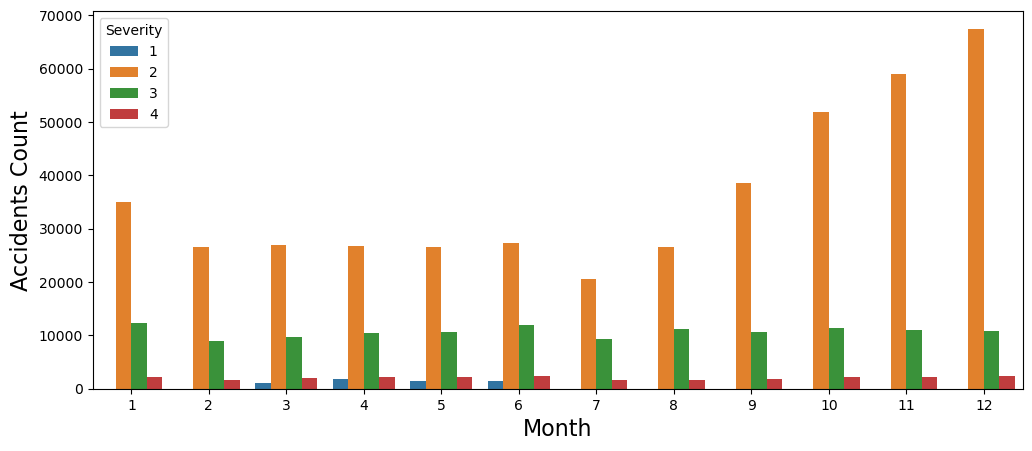

In [34]:
plt.figure(figsize=(12,5), dpi=100)
sns.barplot(x='Start_Time_Month', y='ID', hue='Severity', data=df_Severity_month, ci=None)
plt.ylabel('Accidents Count', size=16)
plt.xlabel('Month', size=16)
plt.show()

In [35]:
'''
for year in df_Severity_month['Start_Time_Year'].unique():
    df_month = df_Severity_month[df_Severity_month['Start_Time_Year']==year]
    plt.figure(figsize=(10,4), dpi=100)
    sns.barplot(x='Start_Time_Month', y='ID', hue='Severity', data=df_month, ci=None)
    plt.ylabel('Accidents Count', size=16)
    plt.xlabel('Month of Year '+ str(year), size=16)
    plt.show()
    '''

"\nfor year in df_Severity_month['Start_Time_Year'].unique():\n    df_month = df_Severity_month[df_Severity_month['Start_Time_Year']==year]\n    plt.figure(figsize=(10,4), dpi=100)\n    sns.barplot(x='Start_Time_Month', y='ID', hue='Severity', data=df_month, ci=None)\n    plt.ylabel('Accidents Count', size=16)\n    plt.xlabel('Month of Year '+ str(year), size=16)\n    plt.show()\n    "

In [36]:
sns.set_style("whitegrid")

In [37]:
df['Start_Time_DayOfWeek'] = df['Start_Time'].apply(lambda time : time.dayofweek)

In [38]:
df_DayOfWeek = df.groupby('Start_Time_DayOfWeek').count()['ID']

Text(0.5, 0, 'Day of the Week')

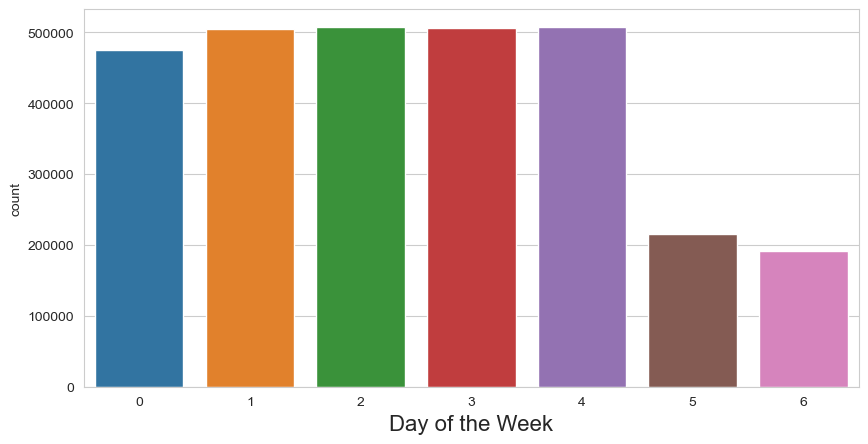

In [39]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(x=df['Start_Time_DayOfWeek'])
plt.xlabel('Day of the Week', size=16)

### Hours Analysis on Sunday

Text(0.5, 0, 'Sunday Start Time')

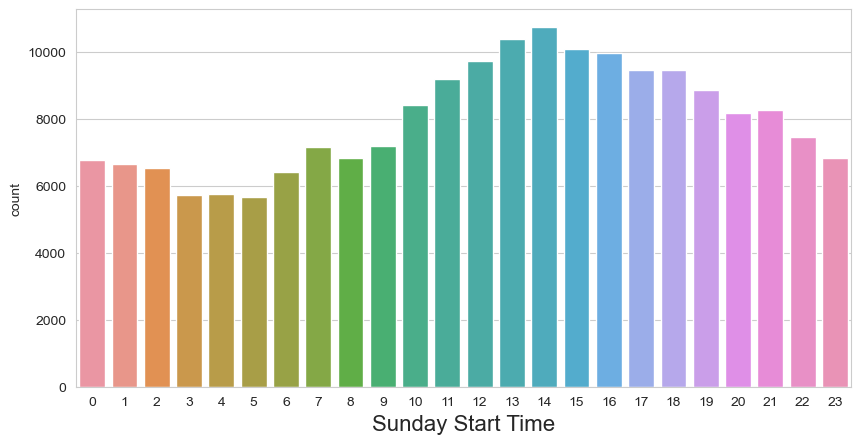

In [40]:
Sunday_start_time = df['Start_Time'][df['Start_Time_DayOfWeek']==6]
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x=Sunday_start_time.dt.hour)
plt.xlabel('Sunday Start Time', size=16)

Text(0.5, 0, 'Saturday Start Time')

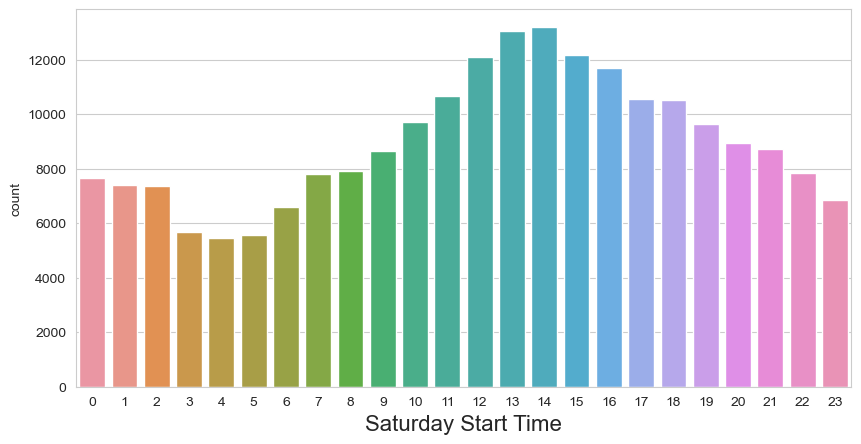

In [41]:
Saturday_start_time = df['Start_Time'][df['Start_Time_DayOfWeek']==5]
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x=Saturday_start_time.dt.hour)
plt.xlabel('Saturday Start Time', size=16)

In [42]:
df_hours = df['Start_Time_Hour'].value_counts().reset_index().rename(columns={'index':'Hours', 'Start_Time_Hour': 'Cases'}).sort_values('Hours')
df_hours

,Hours,Cases
20,0,53242
21,1,49708
22,2,45443
23,3,38465
18,4,60247
15,5,82780
8,6,145923
1,7,215116
0,8,220131
9,9,142802


### Hours Analysis

Text(0.5, 0, 'Start Time in Hours')

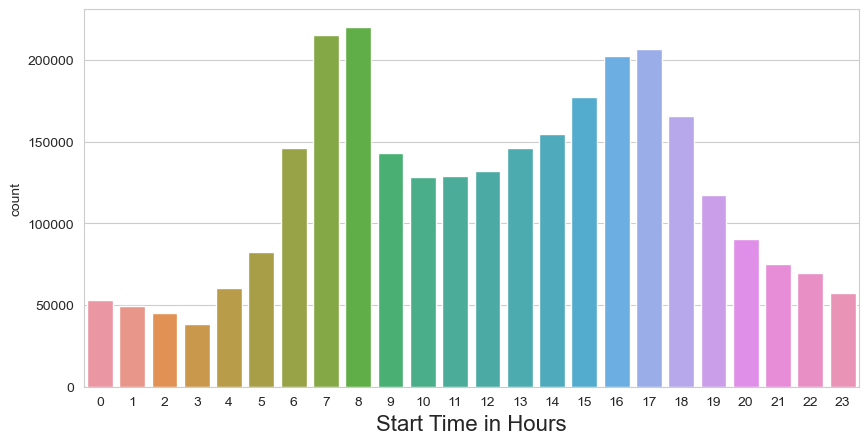

In [43]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x=df['Start_Time_Hour'])
plt.xlabel('Start Time in Hours', size=16)

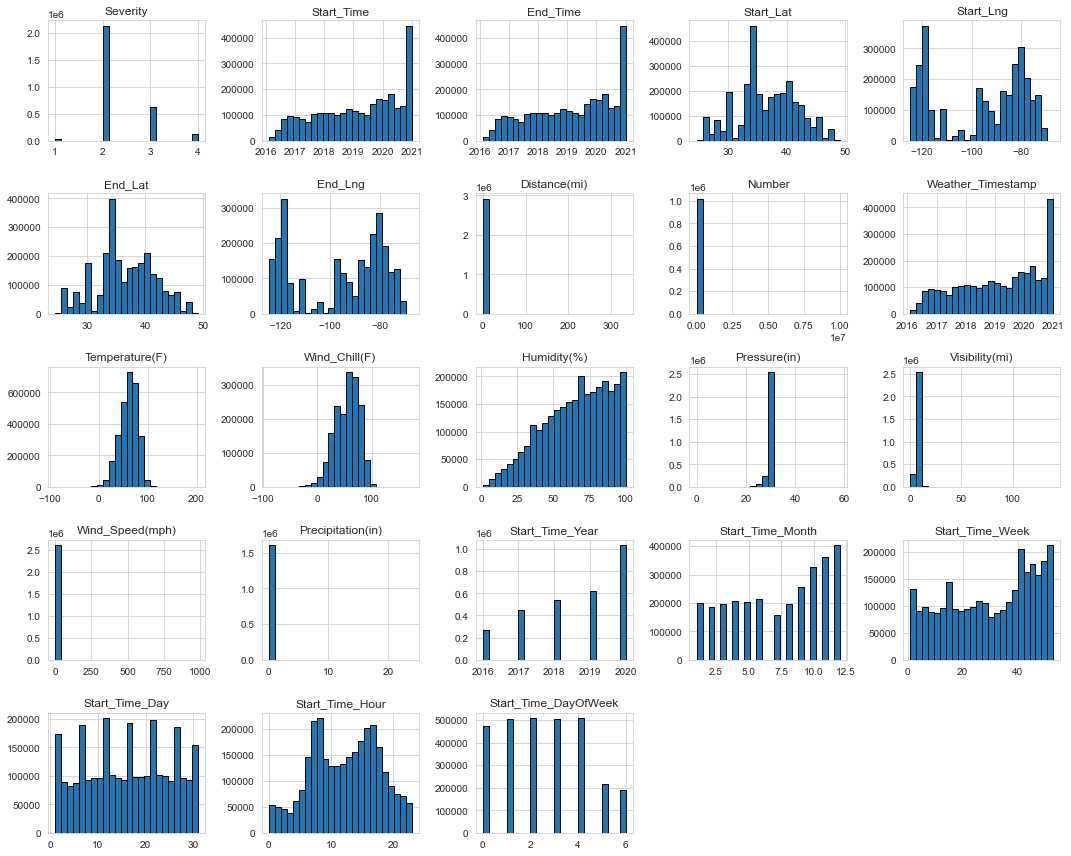

In [44]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=24, figsize=(15, 12), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

## Advance Analysis

### Year Analysis

In [45]:
df_year = pd.DataFrame(df['Start_Time_Year'].value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time_Year':'Cases'}).sort_values(by='Cases', ascending=True)

In [46]:
df_year

,Year,Cases
4,2016,270881
3,2017,448268
2,2018,535921
1,2019,617712
0,2020,1033828


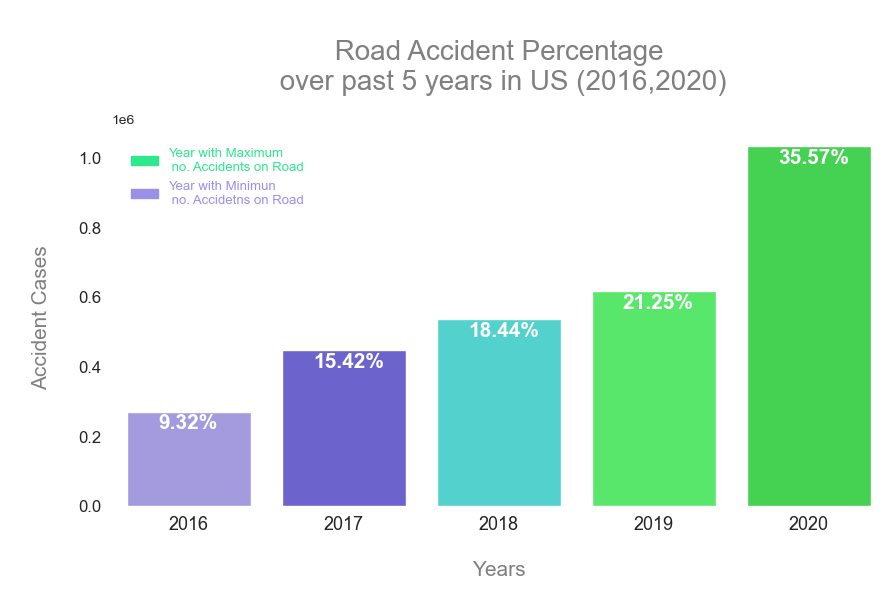

In [47]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)

ax = sns.barplot(y=df_year['Cases'] ,x=df_year['Year'], palette=['#9a90e9', '#5d52de', '#3ee6e0', '#40ff59','#2ee83e'])

for idx in ax.patches:
    ax.text(idx.get_x() + 0.2 , idx.get_height() - 50000, str(round((idx.get_height()/df.shape[0])*100, 2)) + '%'
            , fontsize=15, weight='bold', color='white')

#plt.ylim(10000,1000000)
plt.title('\n Road Accident Percentage \n over past 5 years in US (2016,2020)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nYears\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

for i in ['bottom','top','left','right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.2)
    
for k in ['top', 'right', 'bottom', 'left']:
    side = ax.spines[k]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=0.3)
MA = mpatches.Patch(color='#2ee88e', label='Year with Maximum\n no. Accidents on Road')
MI = mpatches.Patch(color='#9a90e8', label='Year with Minimun\n no. Accidetns on Road')
ax.legend(handles=[MA, MI], prop={'size': 9.5}, loc='best', borderpad=1, 
          labelcolor=['#2ee88e', '#9a90e8'], edgecolor='white');
plt.show()

### Month Analysis

In [48]:
df_month = pd.DataFrame(df['Start_Time_Month'].value_counts()).reset_index().rename(columns={'index':'Month',
                                                                                           'Start_Time_Month':'Cases'}).sort_values(by='Month')

In [49]:
df_month['Month'] = list(calendar.month_name)[1:]


In [50]:
df_month

,Month,Cases
7,January,198485
10,February,186660
8,March,197969
5,April,205487
6,May,204889
4,June,214558
11,July,157112
9,August,196597
3,September,255159
2,October,326430


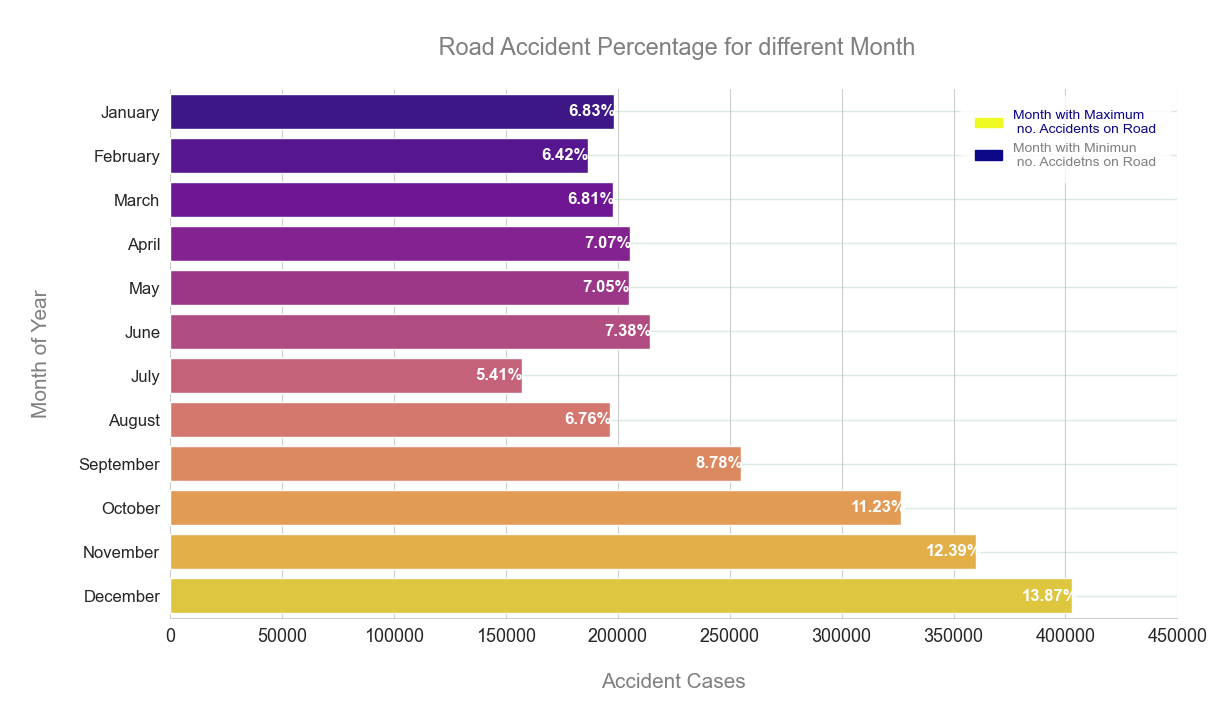

In [51]:
fig, ax = plt.subplots(figsize=(13,7), dpi=100)

cmap = matplotlib.cm.get_cmap('plasma', 12)
col = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax = sns.barplot(x=df_month['Cases'] ,y=df_month['Month'] ,palette='plasma')

for s in ax.patches:
    plt.text(s.get_width()-10000, s.get_y()+0.4,
            '{:.2f}%'.format((s.get_width()*100/df.shape[0])), ha='center', va='center'
             , fontsize=12, color='white', weight='bold')

plt.title(f'\n Road Accident Percentage for different Month\n', size=17, color='grey')
plt.ylabel('\nMonth of Year\n', fontsize=15, color='grey')
plt.xlabel(f'\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0,450000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0,450000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.5)
    
MA = mpatches.Patch(color=col[-1], label='Month with Maximum\n no. Accidents on Road')
MI = mpatches.Patch(color=col[0], label='Month with Minimun\n no. Accidetns on Road')
    
ax.legend(handles=[MA, MI], prop={'size': 10}, loc='best', borderpad=1, 
              labelcolor=[col[0], 'grey'], edgecolor='white');
plt.show()

In [52]:
gc.collect()

13538

# Data Cleaning and Feature Engineering

In [53]:
num_cols = [col for col in df.columns if df[col].dtypes in ['int64','float64']]
cat_cols = [col for col in df.columns if df[col].dtypes in ['object','bool']]
date_cols = [col for col in df.columns if df[col].dtypes=='datetime64[ns]']

In [54]:
date_cols

['Start_Time', 'End_Time', 'Weather_Timestamp']

In [55]:
cat_cols

['ID',
 'Description',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Wind_Direction',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [56]:
num_cols

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Start_Time_Year',
 'Start_Time_Month',
 'Start_Time_Day',
 'Start_Time_Hour',
 'Start_Time_DayOfWeek']

In [57]:
find_missing_values(df)

City                      0.003716
Civil_Twilight            0.003784
Astronomical_Twilight     0.003784
Nautical_Twilight         0.003784
Sunrise_Sunset            0.003784
Zipcode                   0.038326
Timezone                  0.118007
Airport_Code              0.227344
Weather_Timestamp         1.614148
Pressure(in)              1.957882
Wind_Direction            2.183781
Temperature(F)            2.312797
Humidity(%)               2.451997
Weather_Condition         2.471986
Visibility(mi)            2.479796
End_Lat                   9.730270
End_Lng                   9.730270
Wind_Speed(mph)          10.567740
Wind_Chill(F)            40.729888
Precipitation(in)        44.771263
Number                   65.081728
dtype: float64

### Feature Relationships

In [58]:
df_corr = df.corr()
df_corr = df_corr.drop('Turning_Loop', axis=1)
df_corr = df_corr.drop('Turning_Loop', axis=0)

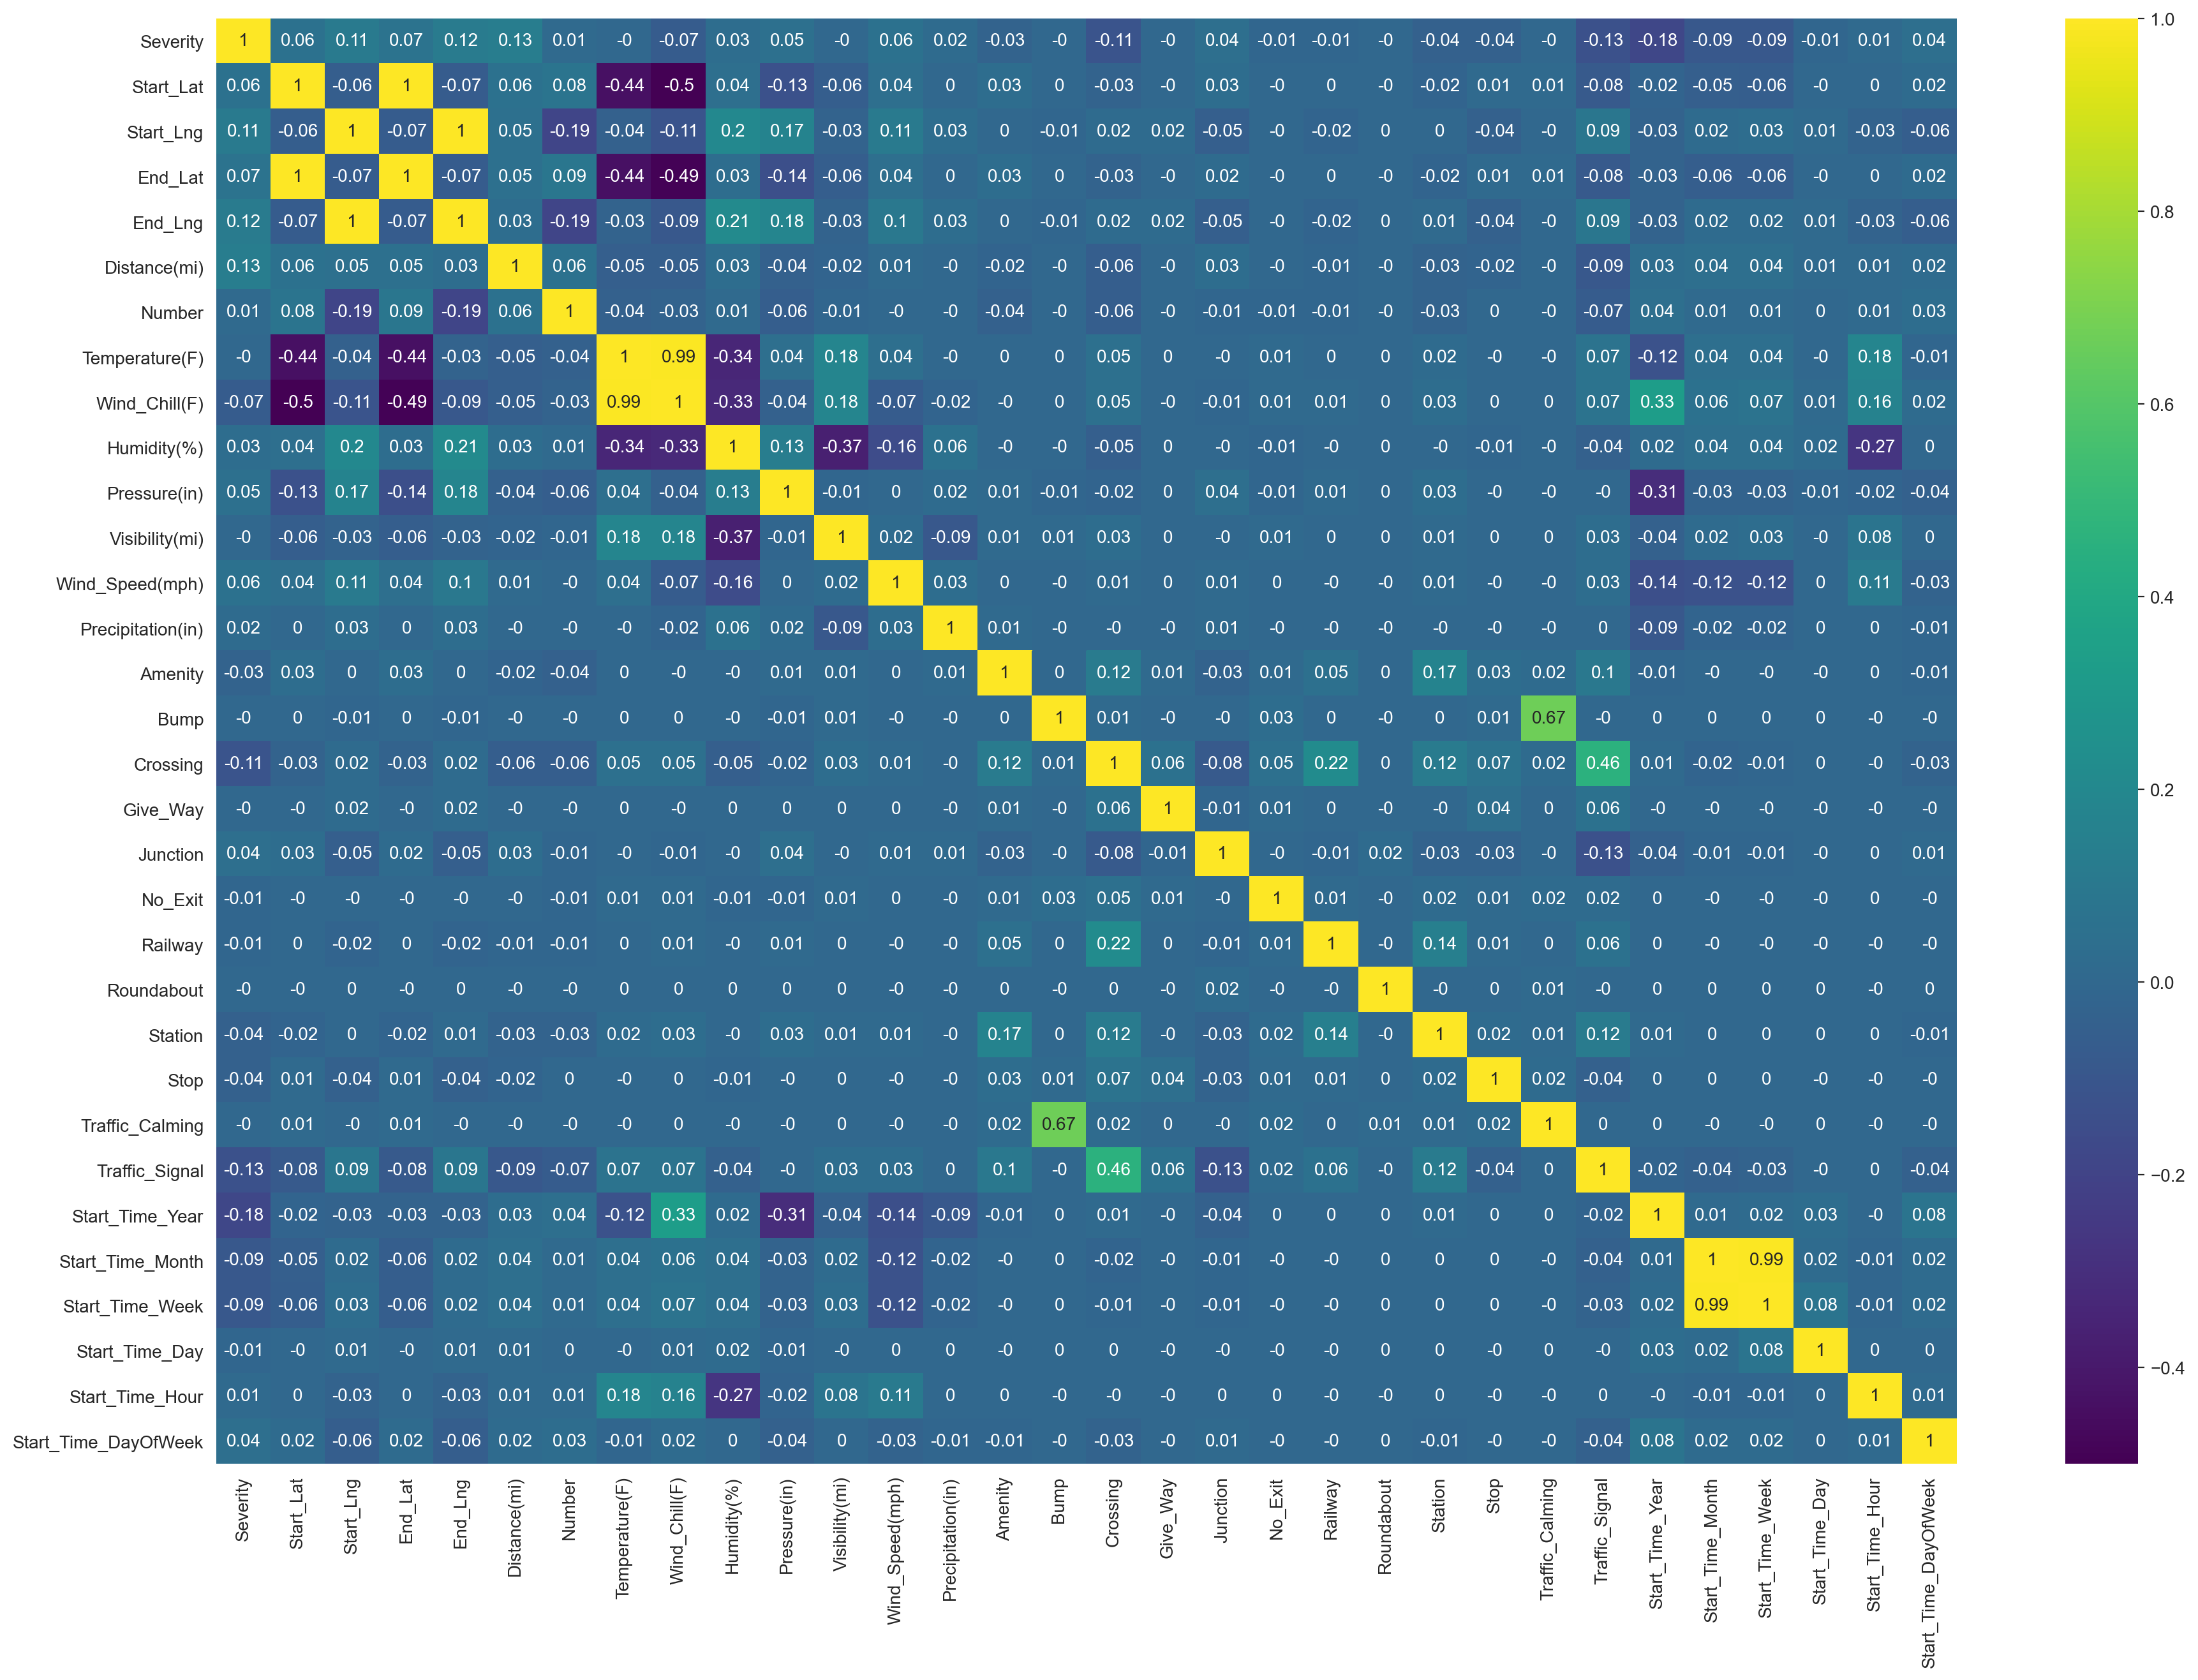

In [59]:
plt.figure(figsize=(22,15), dpi=200)
sns.heatmap(round(df_corr,2), cmap='viridis', annot=True)
plt.show()

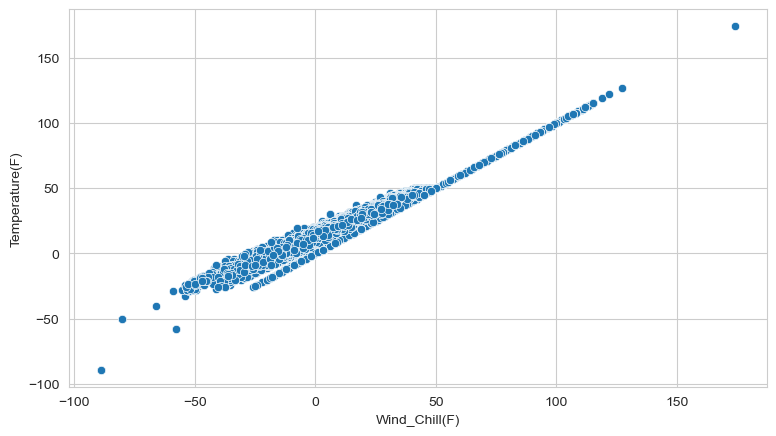

In [60]:
#temperature and wind chill have a 0.99 correlation

plt.figure(figsize=(9,5),dpi=100)
sns.scatterplot(x='Wind_Chill(F)', y='Temperature(F)', data=df)
plt.show()

In [61]:
# Drop the columns City with just 108 missing values missing and the columns Number with more than 65% miss values
df = df.drop(['City', 'Number'], axis=1)

In [62]:
find_missing_values(df)

Astronomical_Twilight     0.003784
Nautical_Twilight         0.003784
Civil_Twilight            0.003784
Sunrise_Sunset            0.003784
Zipcode                   0.038326
Timezone                  0.118007
Airport_Code              0.227344
Weather_Timestamp         1.614148
Pressure(in)              1.957882
Wind_Direction            2.183781
Temperature(F)            2.312797
Humidity(%)               2.451997
Weather_Condition         2.471986
Visibility(mi)            2.479796
End_Lat                   9.730270
End_Lng                   9.730270
Wind_Speed(mph)          10.567740
Wind_Chill(F)            40.729888
Precipitation(in)        44.771263
dtype: float64

In [63]:
df[df[['Sunrise_Sunset', 'Astronomical_Twilight', 'Nautical_Twilight',
       'Civil_Twilight']].isnull()]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_Year,Start_Time_Month,Start_Time_Week,Start_Time_Day,Start_Time_Hour,Start_Time_DayOfWeek
0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
1,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
2,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
3,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
4,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
2906606,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
2906607,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
2906608,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN


In [64]:
df[df[['Sunrise_Sunset', 'Astronomical_Twilight', 'Nautical_Twilight',
       'Civil_Twilight']].isnull()][['Sunrise_Sunset', 'Astronomical_Twilight', 'Nautical_Twilight',
       'Civil_Twilight']]

,Sunrise_Sunset,Astronomical_Twilight,Nautical_Twilight,Civil_Twilight
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
2906605,NaN,NaN,NaN,NaN
2906606,NaN,NaN,NaN,NaN
2906607,NaN,NaN,NaN,NaN
2906608,NaN,NaN,NaN,NaN


In [65]:
df = df.dropna(subset=['Sunrise_Sunset', 'Astronomical_Twilight', 'Nautical_Twilight',
       'Civil_Twilight'])

In [66]:
df.corr()['Temperature(F)'].sort_values()

Start_Lat              -0.440859
End_Lat                -0.435114
Humidity(%)            -0.344182
Start_Time_Year        -0.119421
Distance(mi)           -0.049012
Start_Lng              -0.038226
End_Lng                -0.029350
Start_Time_DayOfWeek   -0.010334
Severity               -0.004710
Junction               -0.004083
Precipitation(in)      -0.002131
Start_Time_Day         -0.000759
Stop                   -0.000637
Traffic_Calming        -0.000263
Amenity                 0.000064
Bump                    0.000566
Give_Way                0.001016
Roundabout              0.001664
Railway                 0.004247
No_Exit                 0.006065
Station                 0.019343
Wind_Speed(mph)         0.039758
Start_Time_Month        0.040074
Pressure(in)            0.040495
Start_Time_Week         0.042724
Crossing                0.046980
Traffic_Signal          0.071729
Visibility(mi)          0.178299
Start_Time_Hour         0.182646
Wind_Chill(F)           0.993374
Temperatur

In [67]:
df = df.drop('Turning_Loop', axis=1)

In [68]:
# Make all Zipcode 5 digit
zipcodes = pd.DataFrame(df[[not a for a in df['Zipcode'].isna()]]['Zipcode'].str[:5])
zipindex = np.array(df[df['Zipcode'].notnull()].index)
df.loc[zipindex, 'Zipcode'] = zipcodes.loc[:, 'Zipcode']

In [69]:
df['Zipcode']

0          29607
1          28270
2          95033
3          89705
4          33324
           ...  
2906605    77018
2906606    92324
2906607    33173
2906608    84129
2906609    80916
Name: Zipcode, Length: 2906500, dtype: object

In [70]:
df['Side'].value_counts()

R    2409553
L     496946
           1
Name: Side, dtype: int64

In [71]:
# Replace space with most commont entry
df['Side'] = df['Side'].replace(' ', 'R')

In [72]:
df['Weather_Condition'].replace('Thunder','Thunderstorm')

0                      Fair
1                    Cloudy
2                      Fair
3                     Clear
4                  Overcast
                 ...       
2906605               Clear
2906606               Clear
2906607       Mostly Cloudy
2906608              Cloudy
2906609    Scattered Clouds
Name: Weather_Condition, Length: 2906500, dtype: object

In [73]:
#view unique values of Wind_Direction
df['Wind_Direction'].unique()

array(['N', 'VAR', 'W', 'SSW', 'SSE', 'NNW', 'NE', 'E', 'West', 'S',
       'Variable', 'WSW', 'SW', 'ESE', 'South', 'ENE', 'Calm', 'NNE',
       'CALM', 'NW', 'East', 'North', 'WNW', 'SE', nan], dtype=object)

In [74]:
#replace entries in Wind_Direction
df['Wind_Direction'] = df['Wind_Direction'].replace('North','N')
df['Wind_Direction'] = df['Wind_Direction'].replace('Variable','VAR')
df['Wind_Direction'] = df['Wind_Direction'].replace('West','W')
df['Wind_Direction'] = df['Wind_Direction'].replace('East','E')
df['Wind_Direction'] = df['Wind_Direction'].replace('South','S')
df['Wind_Direction'] = df['Wind_Direction'].replace('Calm','CALM')

In [75]:
df['Wind_Direction'].unique()

array(['N', 'VAR', 'W', 'SSW', 'SSE', 'NNW', 'NE', 'E', 'S', 'WSW', 'SW',
       'ESE', 'ENE', 'CALM', 'NNE', 'NW', 'WNW', 'SE', nan], dtype=object)

In [76]:
zipcode_Lat_Lng = df.loc[np.array(df[df['Zipcode'].isnull()].index), ['Start_Lat', 'Start_Lng']]
print(zipcode_Lat_Lng)

         Start_Lat   Start_Lng
3181     26.374345  -80.568151
7514     27.914365  -82.621284
9746     44.308128  -71.220253
10848    26.146540  -80.628502
11421    27.925198  -82.593422
...            ...         ...
2881651  39.001094  -76.399656
2881985  37.932770 -122.409590
2884635  26.156465  -80.763347
2896338  27.919383  -82.610631
2902818  37.933100 -122.414470

[1114 rows x 2 columns]


In [77]:
timezome_Lat_Lng = df.loc[np.array(df[df['Timezone'].isnull()].index), ['Start_Lat', 'Start_Lng']]
print(timezome_Lat_Lng)

         Start_Lat   Start_Lng
1013     44.052030 -121.307190
1626     33.109489  -80.131248
3181     26.374345  -80.568151
5896     44.269230 -121.511530
7062     44.265019 -121.508714
...            ...         ...
2901682  44.054930 -121.307040
2902120  44.058254 -121.307206
2902818  37.933100 -122.414470
2904435  33.046879  -80.108269
2905918  44.069994 -121.306360

[3430 rows x 2 columns]


In [78]:
#initialize Nominatim for finding missing cities and zipcodes based on lat/lng

from geopy.geocoders import Nominatim
geo = Nominatim(user_agent="geoapiExercises")

In [80]:
# fill missing values in columns Zipcode

for idx in np.array(df[df['Zipcode'].isnull()].index):
    
    location = geo.reverse(zipcode_Lat_Lng.loc[idx,'Start_Lat'].astype('str')+","+ zipcode_Lat_Lng.loc[idx, 'Start_Lng'].astype('str'))
    
    address = location.raw['address']
    zipcode = address.get('postcode')
    df.loc[idx, 'Zipcode'] = zipcode
    
    if zipcode==None:
        df.loc[idx, 'Zipcode'] = df[df['State']==df.loc[idx, 'State']]['Zipcode'].mode(dropna=True)[0]

In [ ]:
df['Zipcode'].isnull().sum()

In [ ]:
#

from timezonefinder import TimezoneFinder
instance = TimezoneFinder()

for idx in np.array(df[df['Timezone'].isnull()].index):
    timezone = instance.timezone_at(lng=timezome_Lat_Lng.loc[idx, 'Start_Lng'], lat=timezome_Lat_Lng.loc[idx, 'Start_Lat'])
    df.loc[idx, 'Timezone'] = timezone

In [ ]:
# 
ac_MissIndex = np.array(df[df['Airport_Code'].isnull()].index)
airpot_code  = df.loc[ac_MissIndex, 'State']

print(airpot_code)

In [ ]:
#replace missing airport_code data with most common airport_code for each state
ac_states = pd.DataFrame(df.loc[ac_MissIndex, 'State'].unique(), columns=['State'])

for i in range(len(ac_states)):
    ac_states.loc[i, 'Mode'] = df[df['State'] == ac_states.loc[i ,'State']]['Airport_Code'].mode()[0]
    
for i in ac_MissIndex:
    df.loc[i, 'Airport_Code'] = ac_states[ac_states['State'] == df.loc[i ,'State']]['Mode'].tolist()[0] 

In [ ]:
df['Airport_Code'].isnull().sum()

In [ ]:
# Copy values values from Start to End
latnull = np.array(df[df['End_Lat'].isnull()].index)
df.loc[latnull, 'End_Lat'] = df.loc[latnull, 'Start_Lat']

lngnull = np.array(df[df['End_Lng'].isnull()].index)
df.loc[lngnull, 'End_Lng'] = df.loc[lngnull, 'Start_Lng']

# Replace missing wind_chill data with temperature
wcnull = np.array(df[df['Wind_Chill(F)'].isnull()].index)
df.loc[wcnull, 'Wind_Chill(F)'] = df.loc[wcnull, 'Temperature(F)']

# Replace missing temperature data with wind chill
tempnull = np.array(df[df['Temperature(F)'].isnull()].index)
df.loc[tempnull, 'Temperature(F)'] = df.loc[tempnull, 'Wind_Chill(F)']

# Replace missing data for when
weather_time_null = np.array(df[df['Weather_Timestamp'].isnull()].index)
df.loc[weather_time_null, 'Weather_Timestamp'] = df.loc[weather_time_null, 'End_Time']

In [ ]:
find_missing_values(df)

In [ ]:
# Mode Imputer
df.loc[np.array(df[df['Wind_Direction'].isnull()].index), 'Wind_Direction'] = 'CALM'

df.loc[np.array(df[df['Weather_Condition'].isnull()].index), 'Weather_Condition'] = 'Fair'

In [ ]:
find_missing_values(df).index

In [ ]:
df[['Pressure(in)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']].corr()

In [ ]:
imputer_median = ['Pressure(in)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

In [ ]:
# Impute the rest of missing values with the median values

from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan ,strategy='median')
df_median_fit = imputer.fit_transform(df[imputer_median])
df_median = imputer.transform(df_median_fit)
df[imputer_median] = pd.DataFrame(df_median)

In [ ]:
find_missing_values(df)

In [ ]:
df = df.dropna(subset=imputer_median, axis=0)

In [ ]:
# print number and percentage of null entries per variable
find_missing_values(df)